# Evolution of a normal PSF distribution

This plot aims to create 20 images changing the fwhm parameter of the PSF Gaussian distribution using the GalSim module. Therefore, obtaining various images to create an evolution GIF. 

In [1]:
import galsim
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib


In [2]:
#(optional) set the text font to Latex font. 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer modern"],  
    "axes.labelsize": 14,     
    "axes.linewidth": 0.5,    
    "xtick.labelsize": 14,    
    "ytick.labelsize": 14,   
    "legend.fontsize": 12,    
    "legend.handlelength": 2.0
})

In [3]:
#define the parameters of the galaxy
gal_flux = 0.5*1.e6    
gal_r0 = 2.7       
g1 = 0.3           
g2 = 0.1           
psf_beta = 5
psf_re = 0         
pixel_scale = 0.26  
sky_level = 2.5e3
psf_fwhm_max=2

In [4]:
#this function is useful to create the color gradient of the galaxy. It is also possible to use one of matplotlibs' default color maps

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


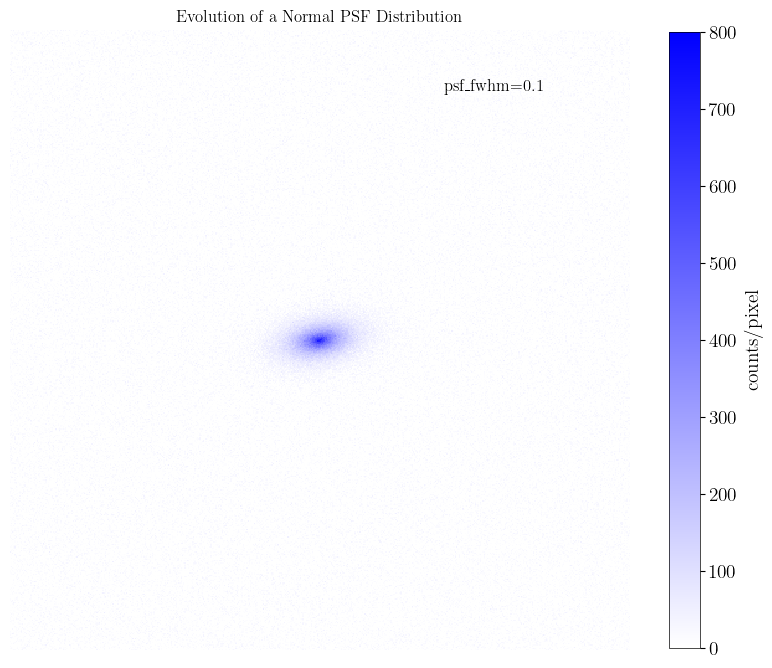

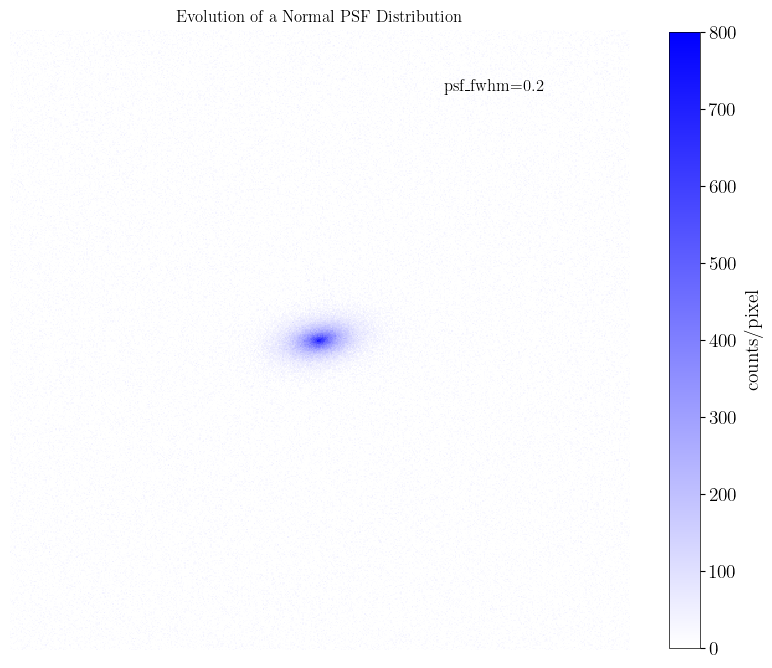

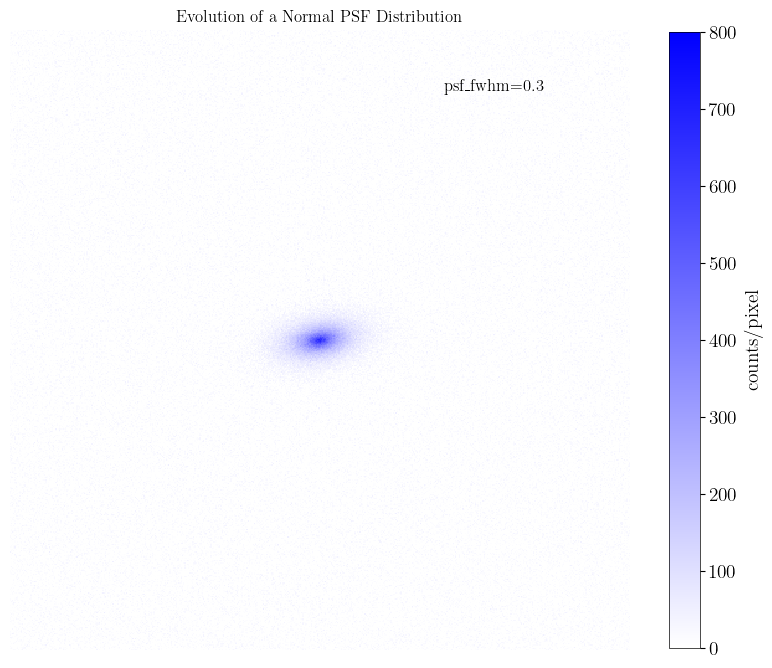

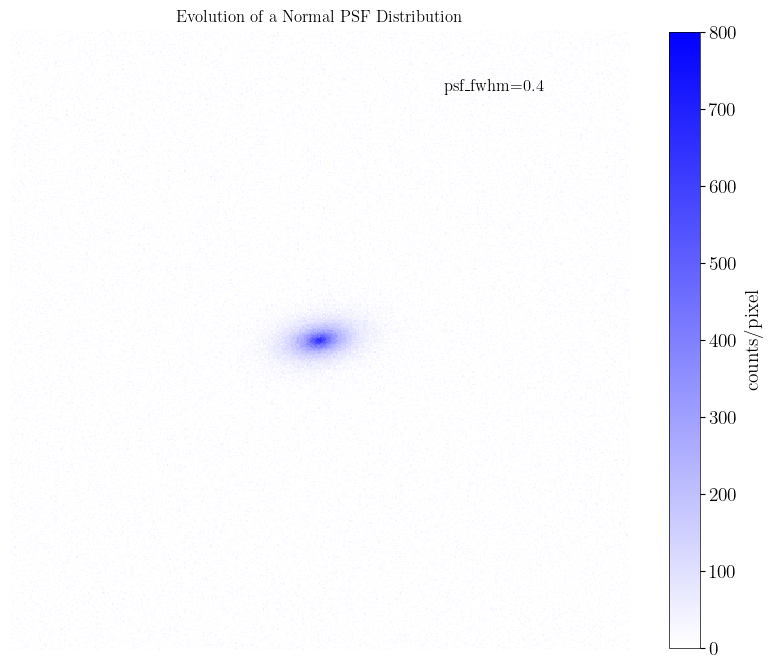

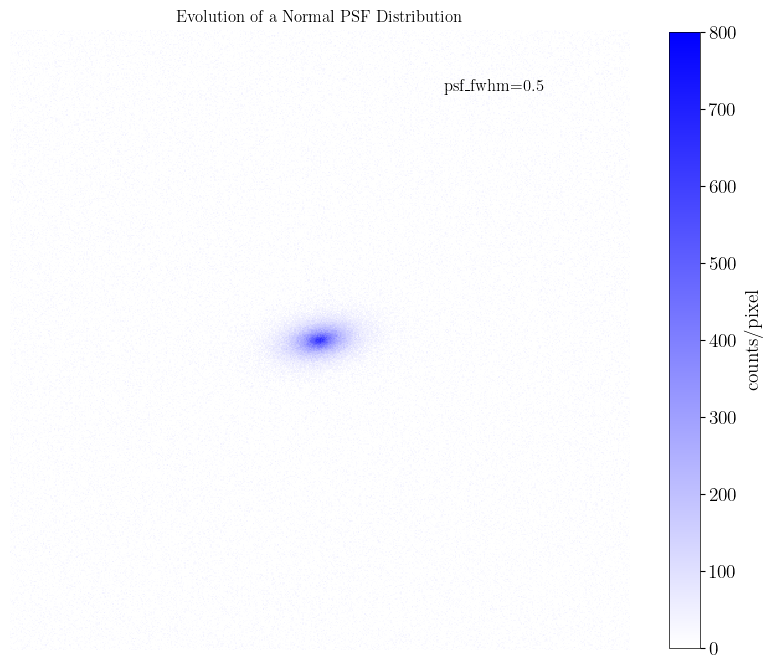

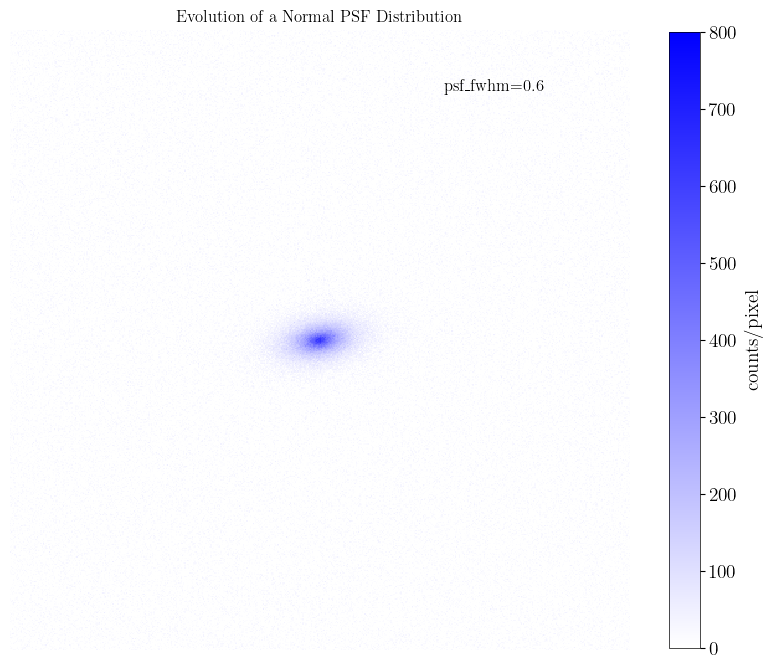

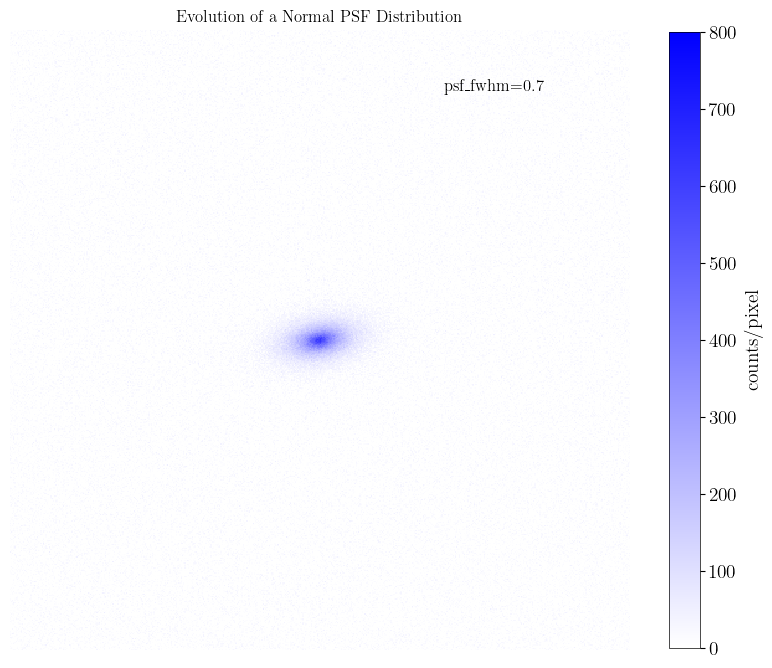

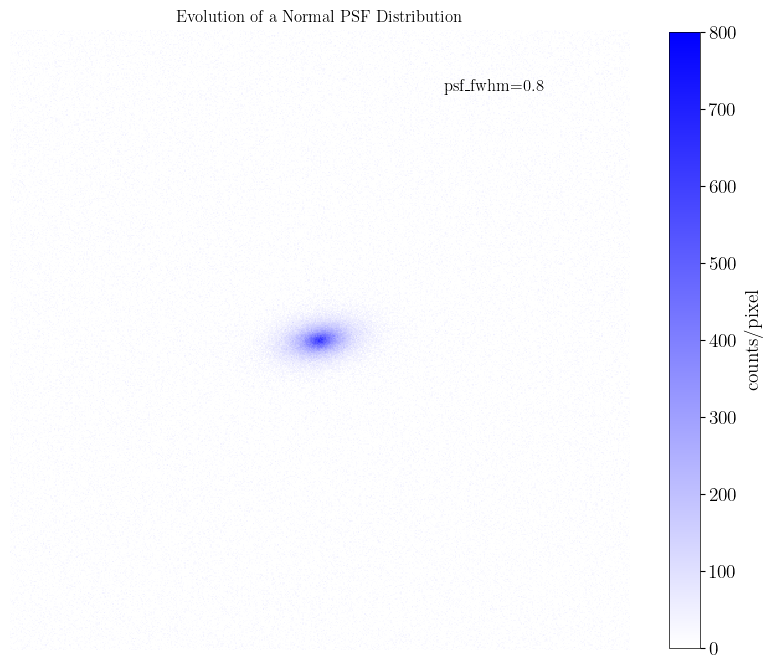

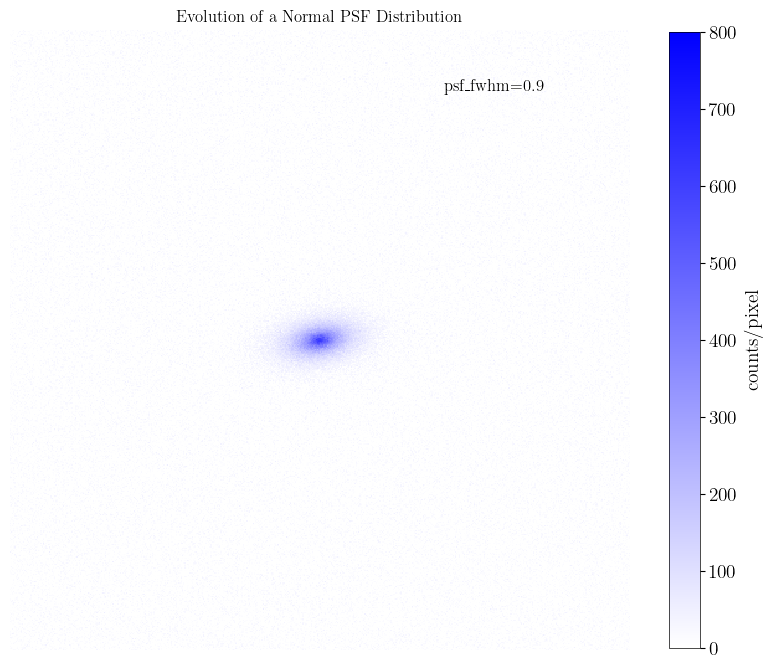

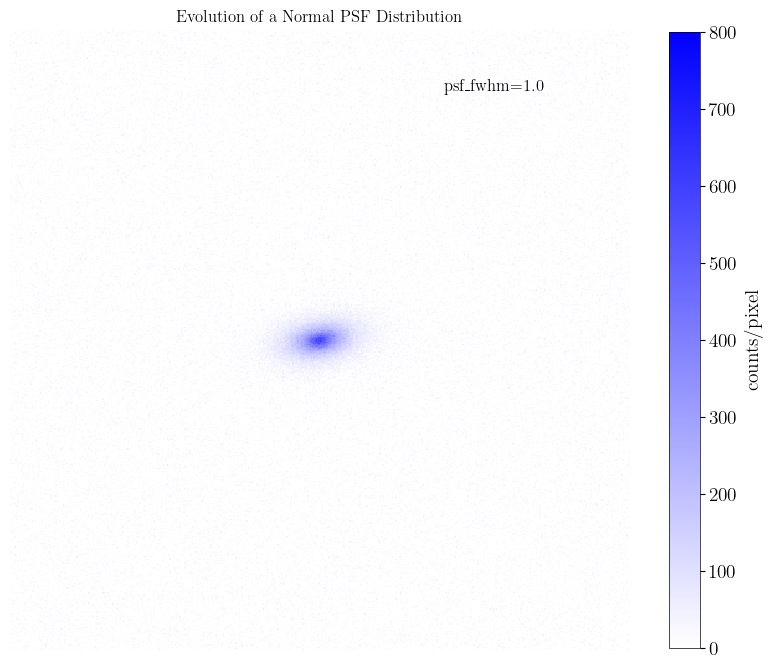

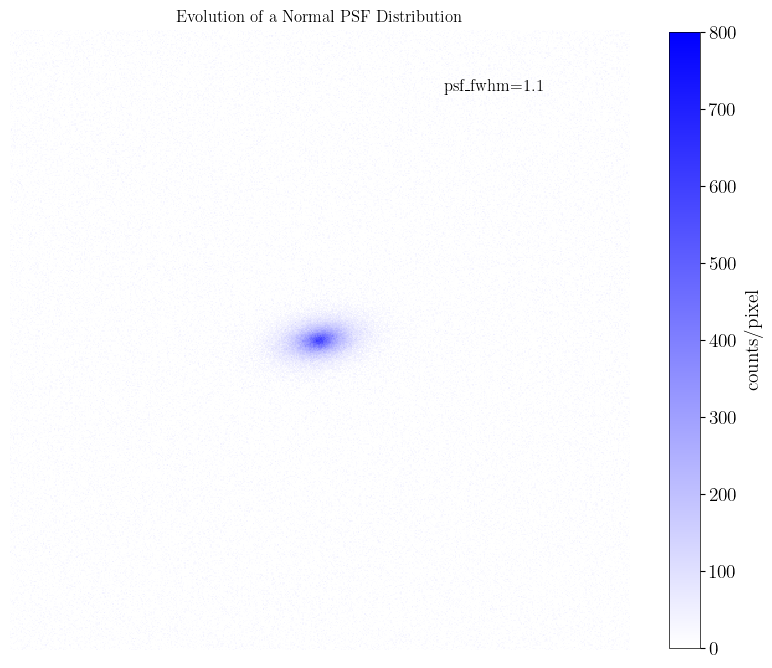

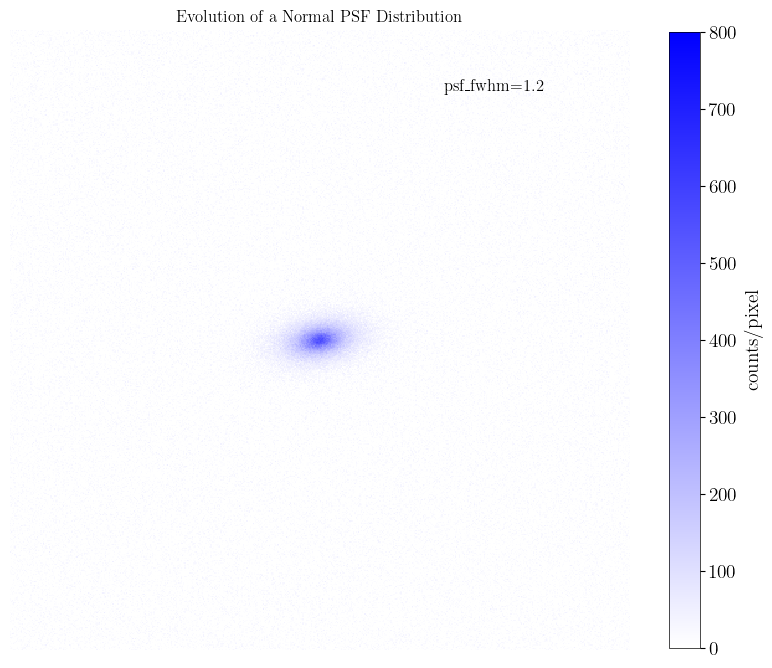

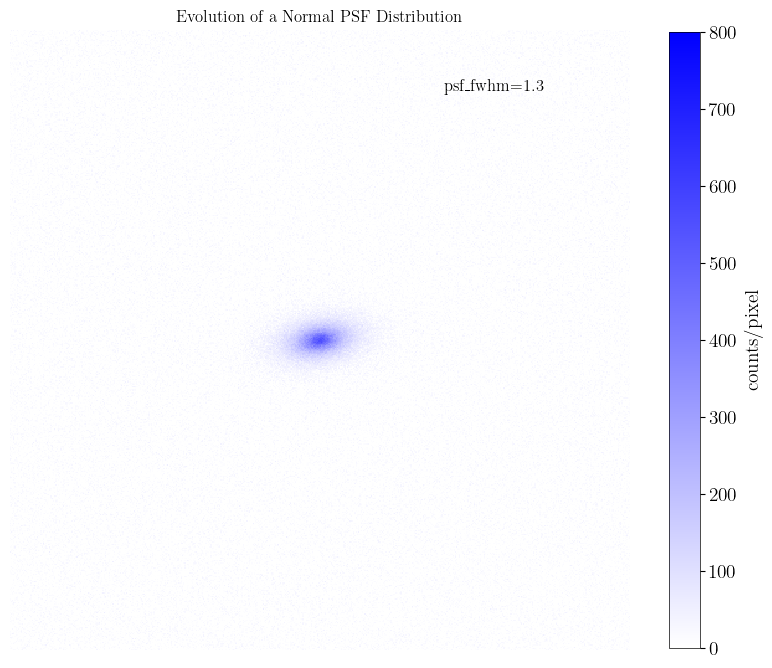

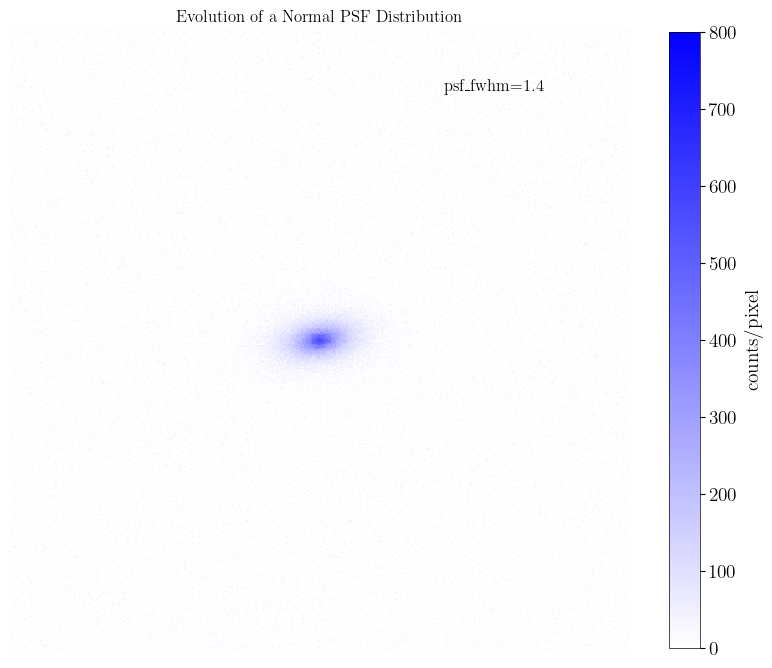

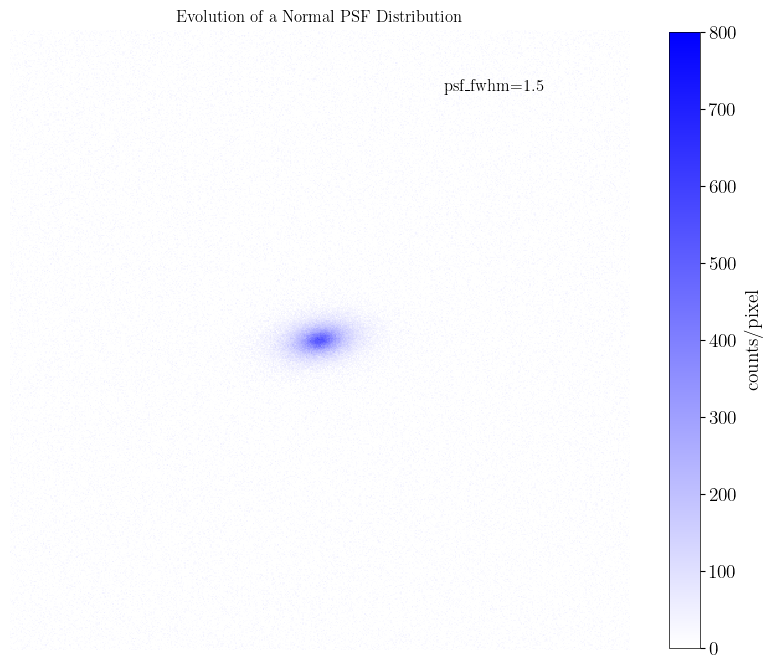

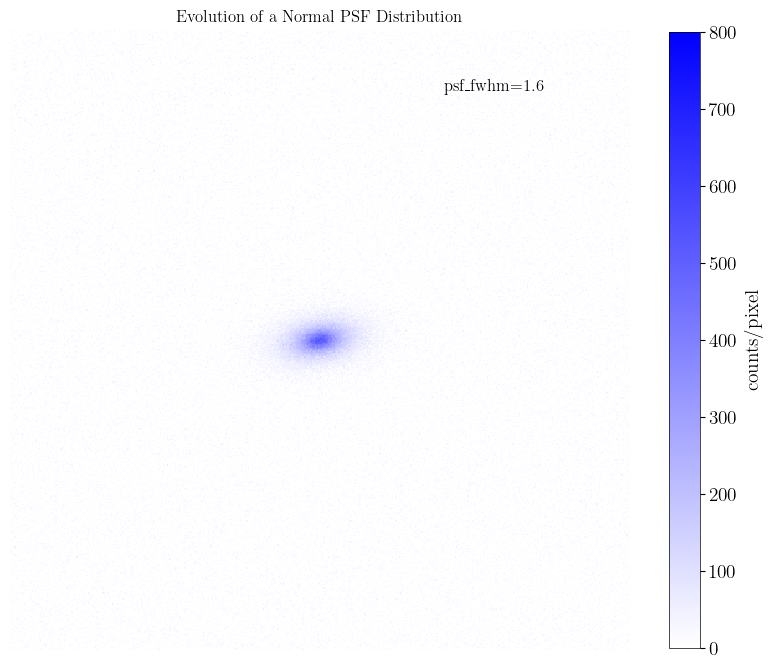

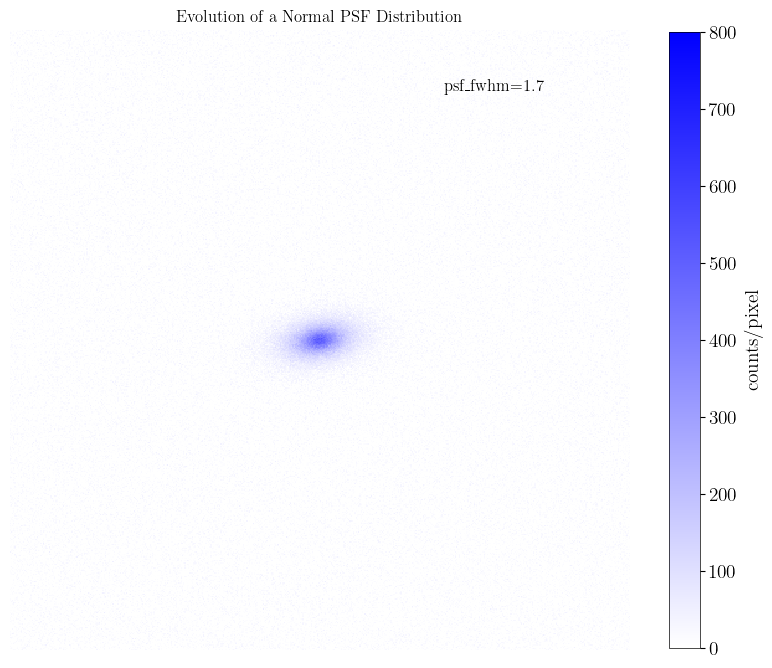

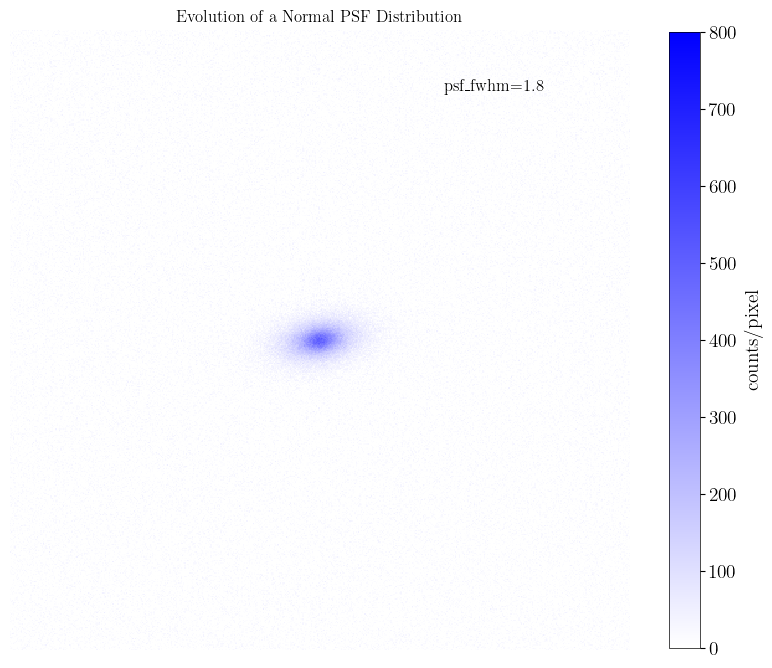

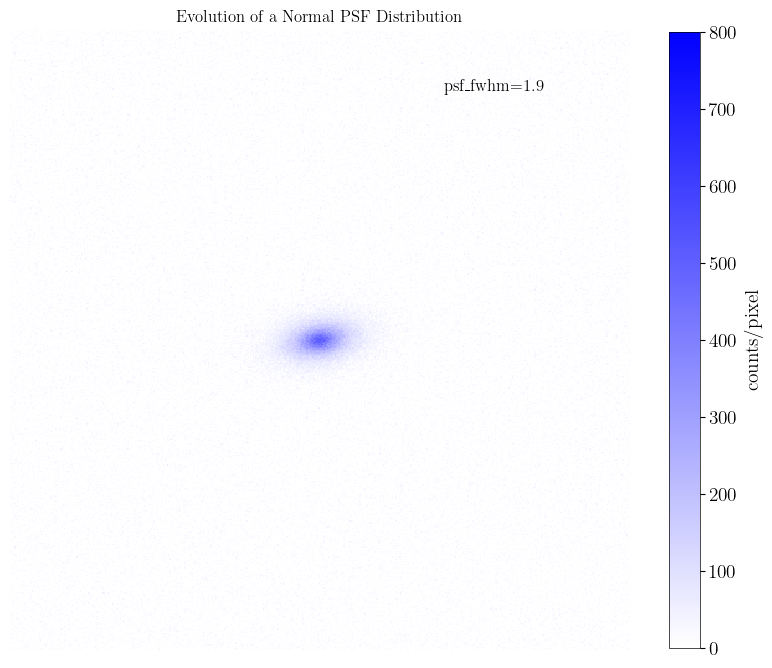

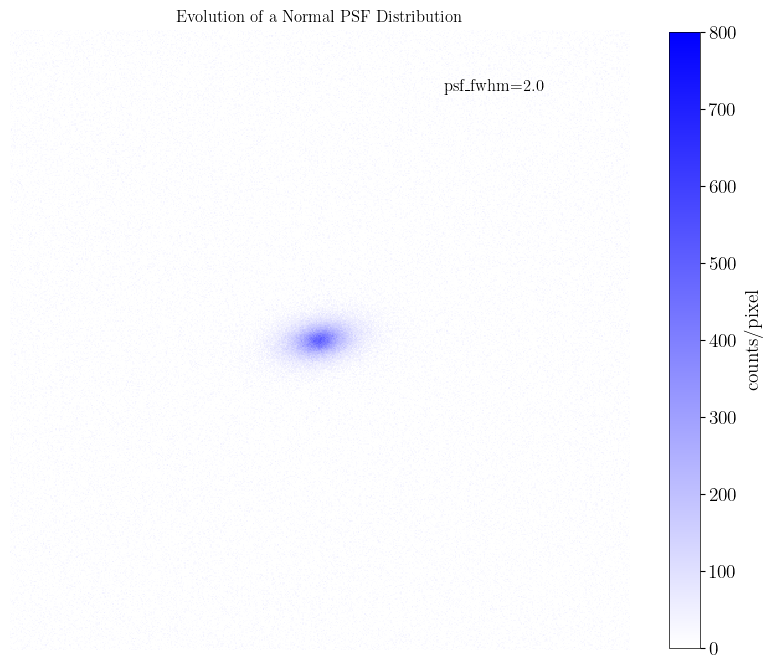

In [5]:

image_size_x, image_size_y = 500,500 #for a more realistic size, use the DECam size 2048x4096 (https://noirlab.edu/science/programs/ctio/instruments/Dark-Energy-Camera/characteristics)

psf_fwhm=0

for i in range(0, 10 * psf_fwhm_max):
    
    psf_fwhm += 0.1

    random_seed = galsim.BaseDeviate(76433).raw()

    rng = galsim.BaseDeviate(random_seed + 1)

    gal = galsim.Exponential(flux=gal_flux, scale_radius=gal_r0) #create the galaxy flux profile

    gal = gal.shear(g1=g1, g2=g2)  #apply shear
    
    psf = galsim.Gaussian(fwhm=psf_fwhm, flux=1.,)  #create the normal PSF profile

    final = galsim.Convolve([gal, psf])
    
    
    image = galsim.ImageF(image_size_x, image_size_y, scale=pixel_scale)
    final.drawImage(image=image)

    sky_level_pixel = sky_level * pixel_scale**2
    noise = galsim.PoissonNoise(rng, sky_level=sky_level_pixel)
    image.addNoise(noise)

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [lighten_color('white', 0), lighten_color("blue", 1)])

    plt.figure(figsize=(10, 10))
    img = plt.imshow(image.array, interpolation='none', cmap=cmap, vmin=0, vmax=800)
    plt.text(0.7 * image_size_x, 0.9 * image_size_y, 'psf_fwhm=' + str(round(psf_fwhm, 1)), size=12)
    plt.axis('on')
    plt.xlim(0, image_size_x)
    plt.ylim(0, image_size_y)
    plt.axis('off') #the pixels of this galaxy are exagerated for the purpose of understanding the flux and psf convolution. That is why the axis are turned off. 
    plt.title('Evolution of a Normal PSF Distribution')
    plt.colorbar(label='counts/pixel', shrink=0.8)
    

    plt.tick_params(axis='both',     #(optional) set the ticks as desired  
                which='both',      
                bottom=True,       
                top=True,          
                left=True,         
                right=True,        
                direction='inout',
                length=4)          
    plt.savefig("psf_fwhm=%.1f.png" % psf_fwhm, bbox_inches='tight',dpi=300) #uncomment to be able to save each file and convert it into a GIF
    plt.show()
    plt.close()


